# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [6]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [7]:
df_qualitativas = df[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']]

In [8]:
df_qualitativas['data_ref'] = pd.to_datetime(df_qualitativas['data_ref'])

# Extract month and year for grouping
df_qualitativas['mes'] = df_qualitativas['data_ref'].dt.to_period('M')

# Checking the transformed data
df_qualitativas.head()

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_13892\3408736712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualitativas['data_ref'] = pd.to_datetime(df_qualitativas['data_ref'])
C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_13892\3408736712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualitativas['mes'] = df_qualitativas['data_ref'].dt.to_period('M')


,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mes
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,2015-01
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,2015-01
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,2015-01
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,2015-01
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,2015-01


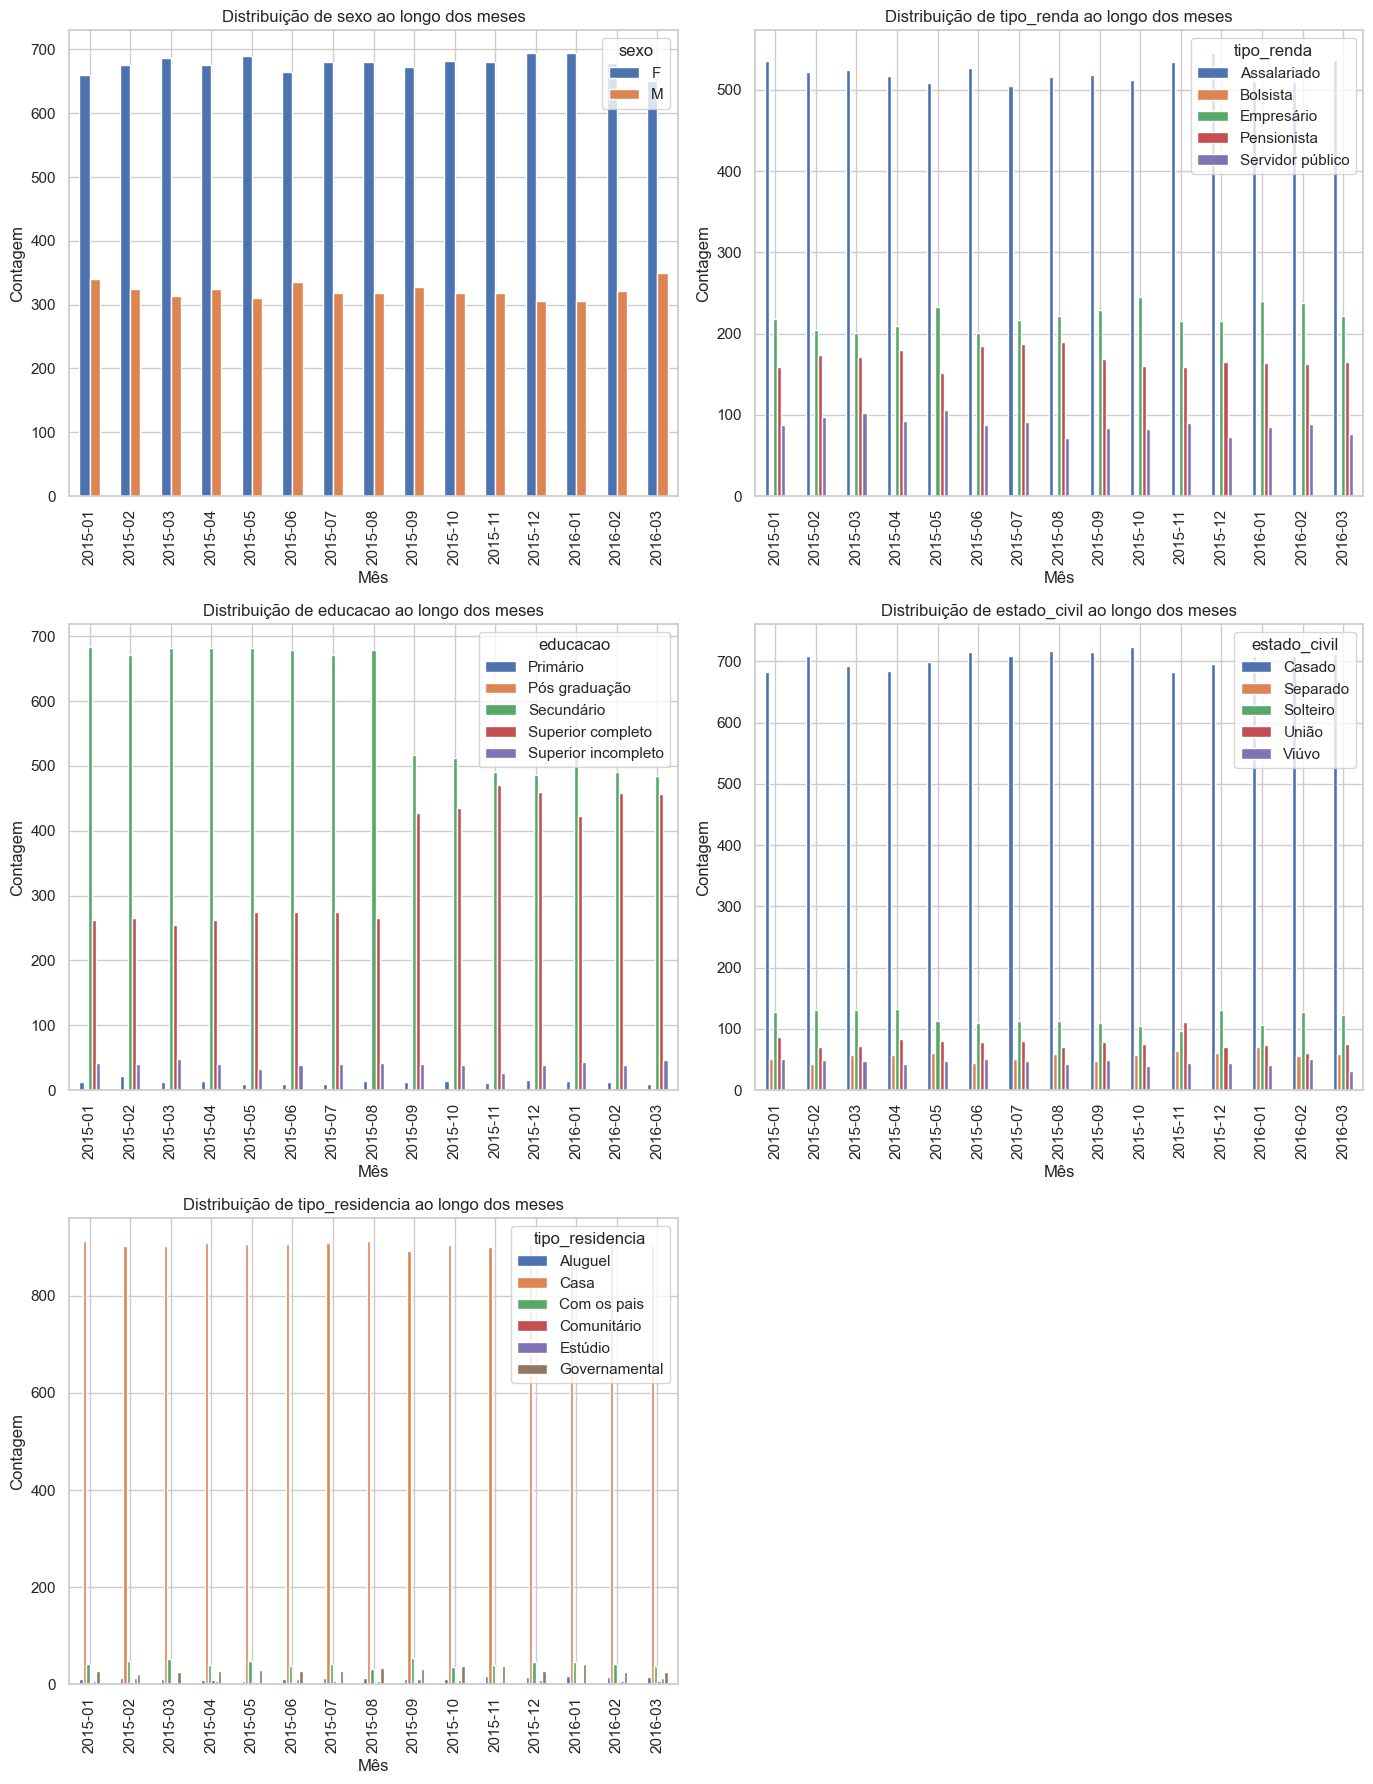

In [9]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()  # Flatten the axes array for easier iteration

qualitative_vars = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

for i, var in enumerate(qualitative_vars):
    
    data_crosstab = pd.crosstab(df_qualitativas['mes'], df_qualitativas[var])
    
    data_crosstab.plot(kind='bar', ax=axes[i], legend=True)
    axes[i].set_title(f'Distribuição de {var} ao longo dos meses')
    axes[i].set_xlabel('Mês')
    axes[i].set_ylabel('Contagem')
    axes[i].legend(title=var)

plt.tight_layout()

if len(axes) > len(qualitative_vars):
    for ax in axes[len(qualitative_vars):]:
        fig.delaxes(ax)

plt.show()

PARA A COMPARAÇÃO DAS VARIÁVEIS QUANTITATIVAS AO LONGO DOS MESES E SEUS VALORES 'CONTAGEM' PODEMOS NOTAR QUE NO QUESITO EDUCAÇÃO
O VALOR 'SECUNDÁRIO' QUE ATÉ O MÊS 08 ERA SOBERADO, A PARTIR DO MÊS 09 COMEÇA A SER IGUALADO PELO 'PÓS GRADUAÇÃO' 

In [12]:
df_qualitativas_renda = df[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia','renda' ]]
df_qualitativas_renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,renda
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,3369.24
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,6096.14
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,5658.98
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,7246.69
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,4017.37


In [13]:
df_qualitativas_renda['data_ref'] = pd.to_datetime(df_qualitativas_renda['data_ref'])

df_qualitativas_renda['mes'] = df_qualitativas_renda['data_ref'].dt.to_period('M')

df_qualitativas_renda.head()

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_13892\2522245005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualitativas_renda['data_ref'] = pd.to_datetime(df_qualitativas_renda['data_ref'])
C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_13892\2522245005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualitativas_renda['mes'] = df_qualitativas_renda['data_ref'].dt.to_period('M')


,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,renda,mes
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,3369.24,2015-01
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,6096.14,2015-01
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,5658.98,2015-01
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,7246.69,2015-01
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,4017.37,2015-01


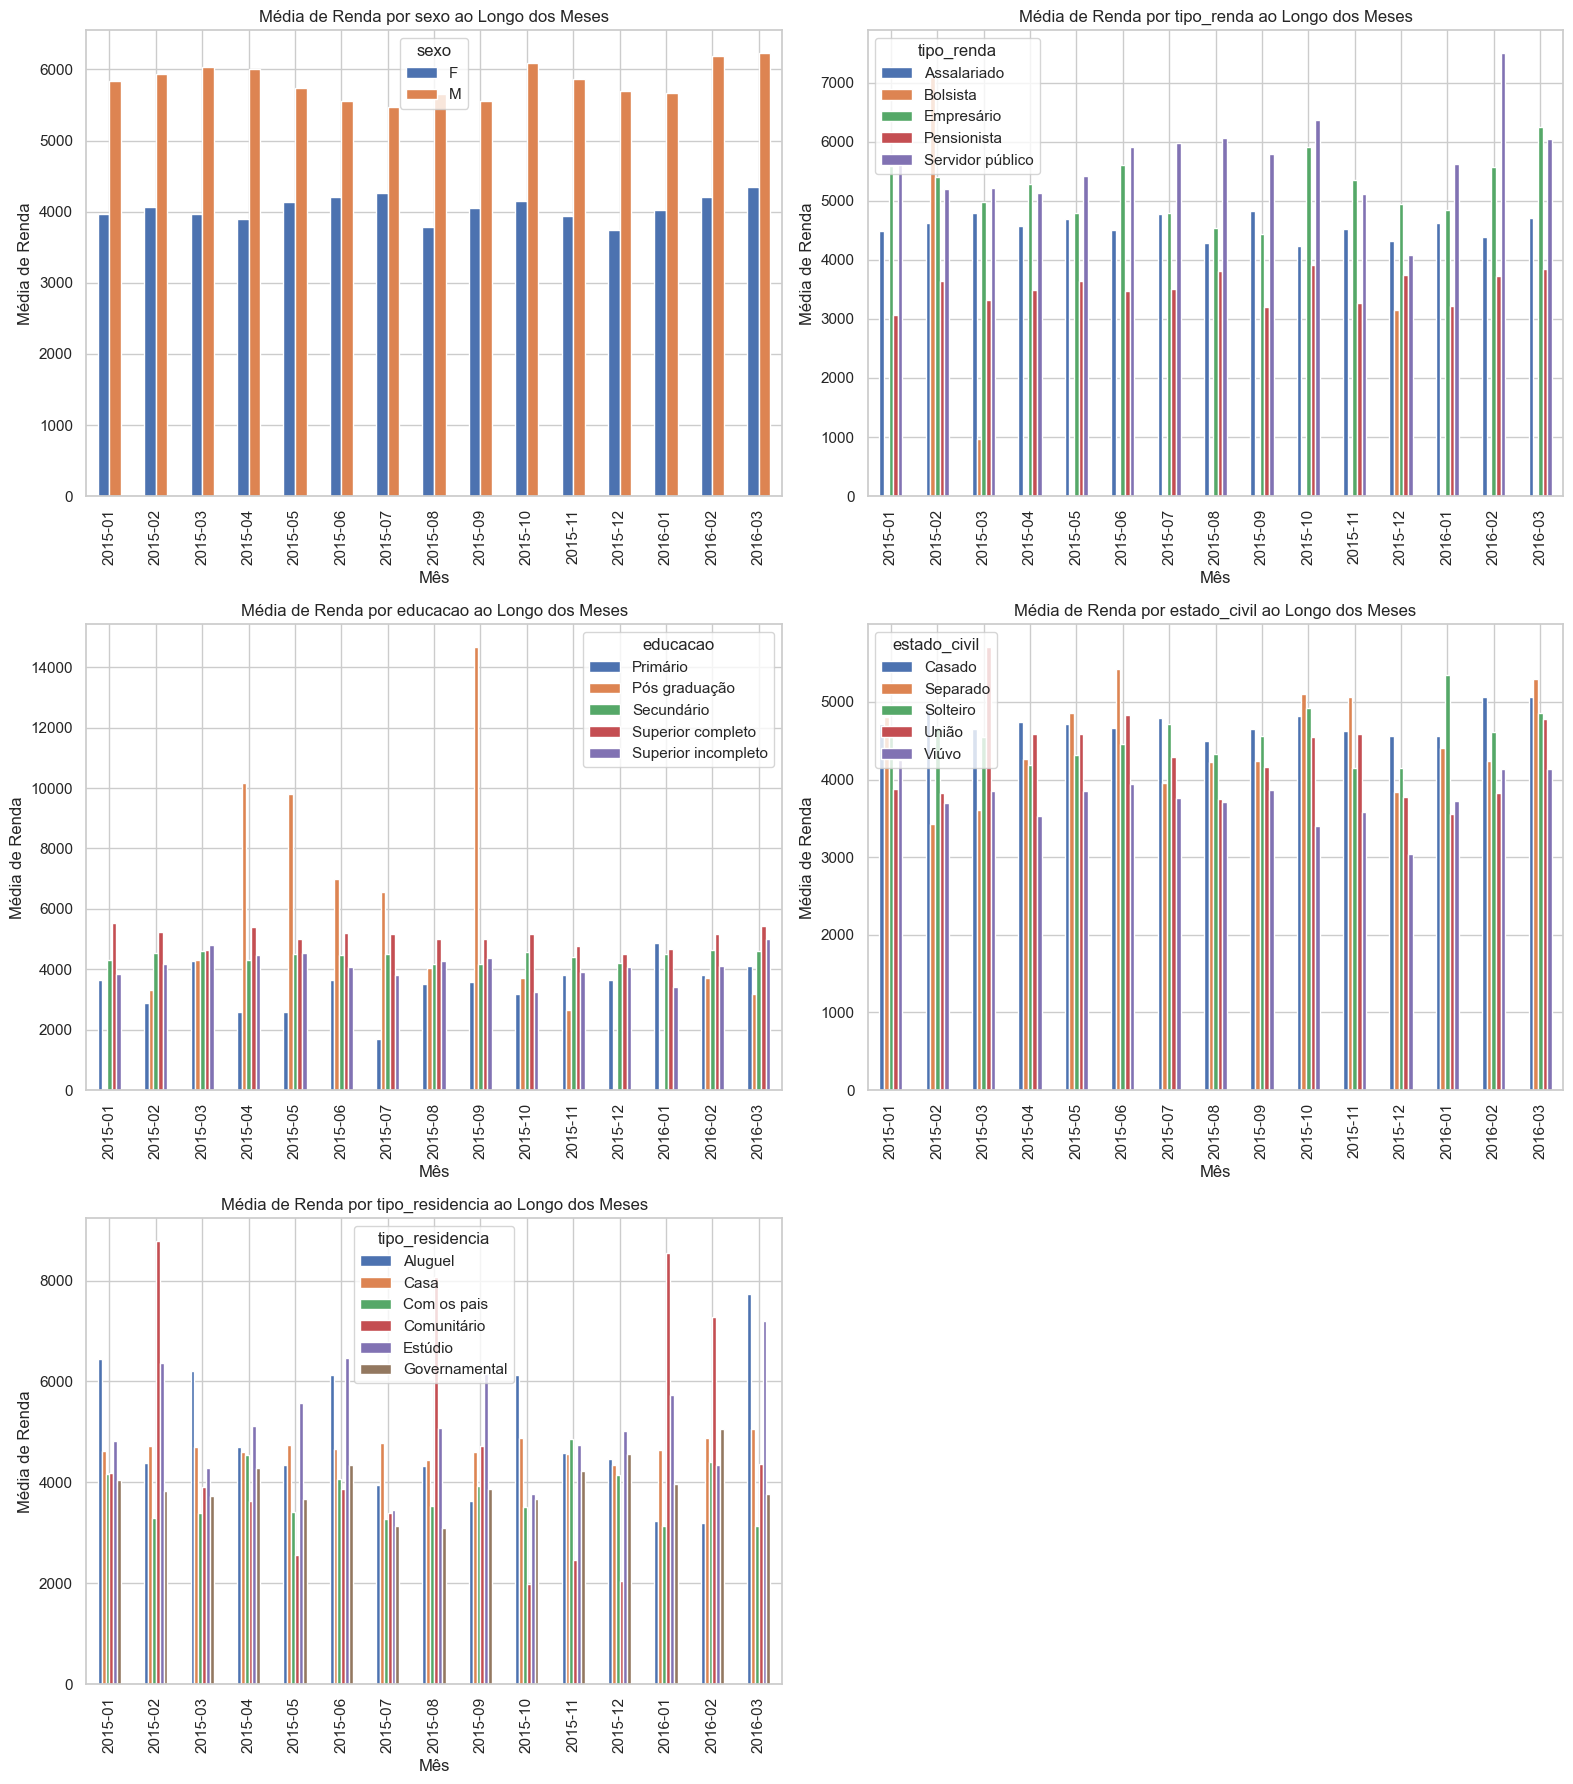

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
axes = axes.flatten()

qualitative_vars_2 = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

for i, var in enumerate(qualitative_vars):
    grouped_data = df_qualitativas_renda.groupby(['mes', var])['renda'].mean().unstack()
    grouped_data.plot(kind='bar', ax=axes[i], legend=True)
    axes[i].set_title(f'Média de Renda por {var} ao Longo dos Meses')
    axes[i].set_xlabel('Mês')
    axes[i].set_ylabel('Média de Renda')
    axes[i].legend(title=var)

plt.tight_layout()
if len(axes) > len(qualitative_vars_2):
    for ax in axes[len(qualitative_vars_2):]:
        fig.delaxes(ax)

plt.show()

PARA A COMPARAÇÃO DAS VARIÁVEIS QUANTITATIVAS AO LONGO DOS MESES E SUAS MÉDIAS DE RENDA PODEMOS NOTAR QUE NO QUESITO EDUCAÇÃO
O VALOR 'PÓS GRADUAÇÃO' TEM UM SALTO NA MÉDIA DE RENDA ENTRE OS MESES 04 E 09 E APÓS ESSE PERÍODO TEM UMA QUEDA

JÁ NO QUESITO TIPO DE RENDA, PERCEBE-SE QUE QUE A CATÉGORIA 'EMPRESÁRIOS' TEM A MAIOR MÉDIA DE RENDA NO PRIMEIRO MÊS DO ANO, NO MÊS SEGUINTE A CATÉGORIA 'BOLSISTAS' QUE TÊM A MAIOR MÉDIA DE RENDA, E ATÉ O FINAL DO ANO A CATÉGORIA 'SERVIDOR PÚBLICO' TEM A MAIOR MÉDIA DE RENDA

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

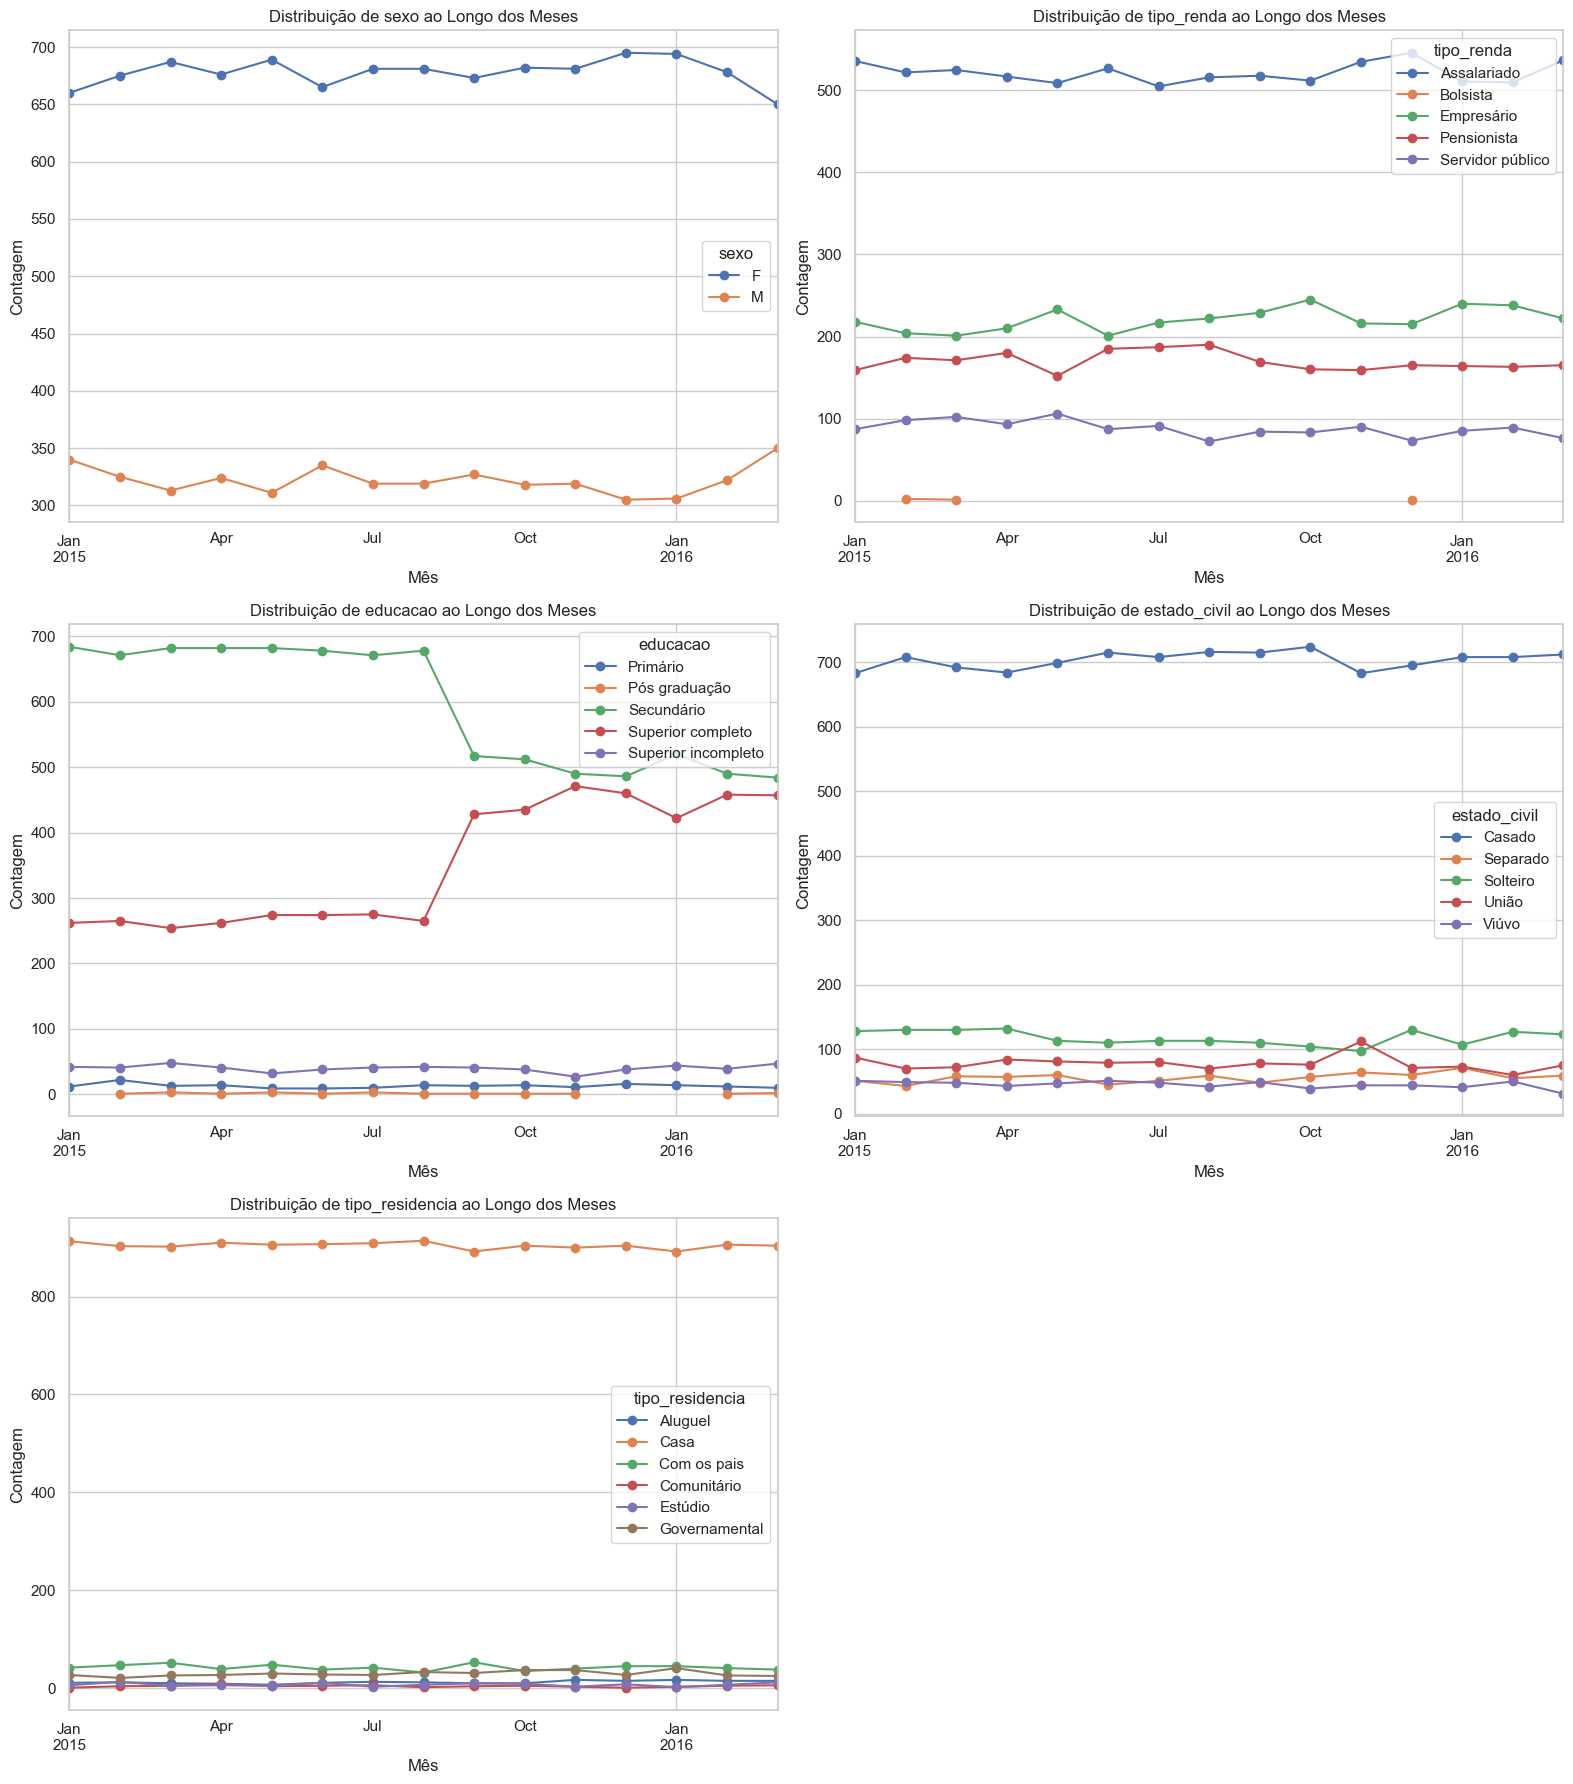

In [22]:


# Generate plots for each qualitative variable to assess stability over time
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
axes = axes.flatten()

qualitative_vars_3 = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

for i, var in enumerate(qualitative_vars):
    grouped_data = df_qualitativas.groupby(['month', var]).size().unstack()
    grouped_data.plot(kind='line', ax=axes[i], legend=True, marker='o')
    axes[i].set_title(f'Distribuição de {var} ao Longo dos Meses')
    axes[i].set_xlabel('Mês')
    axes[i].set_ylabel('Contagem')
    axes[i].legend(title=var)

plt.tight_layout()
if len(axes) > len(qualitative_vars):
    for ax in axes[len(qualitative_vars):]:
        fig.delaxes(ax)

plt.show()